In [73]:
#In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world 
#of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library,
#the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

#Your objective is to build a series of scatter plots to showcase the following relationships:

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

In [247]:
#Dependancies
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy as cp

In [248]:
# We now find the combination of  ( lat,lon) by creating loop for lat in the range -90 to +90, and, lon in the range -180 to 180.
# The we will find the city name corrosponding to that (lat,lon) using citipy module 
# There will be thousands of combunations of (lat,lon). So, we will give by skipping it by 5 in the range.
citylist = []
count = 0
dup = 'no'

# Acoording to AcrcMap( link is given in READ ME):
# (lat) Latitude_range = -90 to + 90
#(lon) Longitude_range = -180 to +180
# Check: GP_cities.py to see howto get lat, lon, cities combination data

for lat in range(-90, 90, 5): 
    for lon in range(-180, 180, 10):
        cp_city = cp.nearest_city(lat,lon) # Capture nearest city from Citipi library
        
        # Use a dictionary to store info of the current city:
        citydict = {} 
        citydict['City_Name'] = cp_city.city_name 
        citydict['Country']= cp_city.country_code
        citydict['Latitude'] = lat
        citydict['Longitude'] = lon
        
        # Add current city info to list: <citylist>:
        if len(citylist) == 0:
            citylist.append(citydict)
            count += 1
            continue
        else:
            #Get rid of duplicates:
            for city_info in citylist:
                if city_info['City_Name'] == citydict['City_Name']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citydict)
            count += 1
        else:
            dup = 'no'

print(len(citylist))

588


In [249]:
import json
import requests as req

In [250]:
# create dataframe to 
citypd = pd.DataFrame({
    "City": [x["City_Name"] for x in citylist],
    "Country": [x["Country"] for x in citylist]
})

citypd.head()

,City,Country
0,vaini,to
1,mataura,pf
2,rikitea,pf
3,punta arenas,cl
4,ushuaia,ar


In [251]:
# import config.py file to read OpenWeatherMap API key, and hide it from the code:
import config

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
base_url = url + "appid=" + config.weather_api_key + "&units=" + units + "&q=" 

In [252]:
count = 0

cities_init = {
    'City': "", 
    'Country': "", 
    'Lat': "", 
    'Lon': "", 
    'Temp': "", 
    'Humidity': "", 
    'Cloudiness': "", 
    'Wind Speed': ""
}
cities500 = pd.DataFrame(data=cities_init, index=[0])

for index,row in citypd.iterrows():
    query_url = base_url + row['City'] + "," + row['Country']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()

        cities500.set_value(count, "City", cityweather['name'])
        cities500.set_value(count, "Country", cityweather['sys']['country'])
        cities500.set_value(count, "Lat", int(cityweather['coord']['lat']))
        cities500.set_value(count, "Lon", int(cityweather['coord']['lon']))
        cities500.set_value(count, "Temp", int(cityweather['main']['temp']))
        cities500.set_value(count, "Humidity", int(cityweather['main']['humidity']))
        cities500.set_value(count, "Cloudiness", int(cityweather['clouds']['all']))
        cities500.set_value(count, "Wind_Speed", int(cityweather['wind']['speed']))
        count+= 1
    except:
        print(f"No data for this city: {row['City'],row['Country']}")

cities500 = cities500[['City', 'Country', 'Cloudiness', 'Humidity', 'Lat', 'Lon', 'Temp', 'Wind_Speed']]
cities500.head()

No data for this city: ('mataura', 'pf')
No data for this city: ('taolanaro', 'mg')
No data for this city: ('tsihombe', 'mg')
No data for this city: ('laguna', 'br')
No data for this city: ('umzimvubu', 'za')
No data for this city: ('marcona', 'pe')
No data for this city: ('toliary', 'mg')
No data for this city: ('grand river south east', 'mu')
No data for this city: ('bengkulu', 'id')
No data for this city: ('halalo', 'wf')
No data for this city: ('satitoa', 'ws')
No data for this city: ('mocambique', 'mz')
No data for this city: ('palabuhanratu', 'id')
No data for this city: ('vaitupu', 'wf')
No data for this city: ('samalaeulu', 'ws')
No data for this city: ('miranorte', 'br')
No data for this city: ('nguiu', 'au')
No data for this city: ('alotau', 'pg')
No data for this city: ('lata', 'sb')
No data for this city: ('saleaula', 'ws')
No data for this city: ('utiroa', 'ki')
No data for this city: ('samusu', 'ws')
No data for this city: ('tucuma', 'br')
No data for this city: ('acarau'

,City,Country,Cloudiness,Humidity,Lat,Lon,Temp,Wind_Speed
0,Vaini,TO,100,100,-21,-175,79,11.0
1,Rikitea,PF,64,100,-23,-134,78,11.0
2,Punta Arenas,CL,40,41,-53,-70,56,24.0
3,Ushuaia,AR,40,75,-54,-68,50,28.0
4,Hermanus,ZA,0,56,-34,19,65,2.0


In [256]:
len(cities500.index)

503

In [262]:
import time
date = time.strftime("%m/%d/%y")

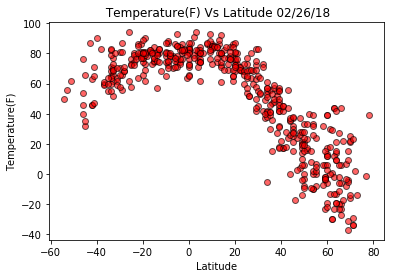

In [263]:
# plotting the graph

plt.scatter(cities500['Lat'],cities500['Temp'],edgecolor = "black", alpha = 0.6, color = "red")
plt.title(f" Temperature(F) Vs Latitude {date}")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.savefig("TempVsLat.png")
plt.show()

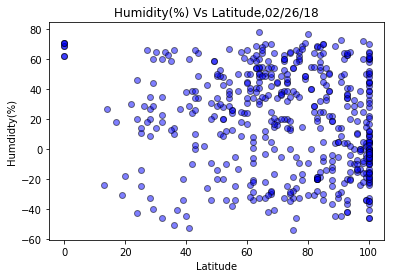

In [264]:
# Humidty vs Lat plot

plt.scatter(cities500["Humidity"], cities500["Lat"], color = "blue", edgecolor = 'black',alpha = 0.5)
plt.title(f"Humidity(%) Vs Latitude,{date}")
plt.xlabel("Latitude")
plt.ylabel("Humdidty(%)")
plt.savefig("HumidityVsLat.png")
plt.show()

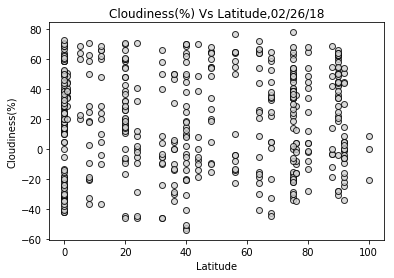

In [271]:
# Cludiness vs Lat plot

plt.scatter(cities500["Cloudiness"], cities500["Lat"], color = "lightgrey", edgecolor = 'black',alpha = 0.8)
plt.title(f"Cloudiness(%) Vs Latitude,{date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("CloudinessVsLat.png")
plt.show()

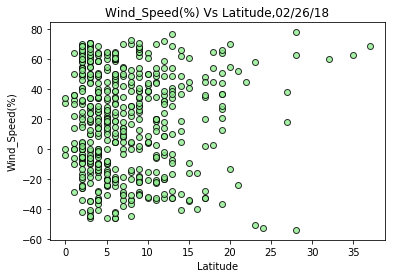

In [273]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities500["Wind_Speed"], cities500["Lat"], color = "lightgreen", edgecolor = 'black',alpha = 0.8)
plt.title(f"Wind_Speed(%) Vs Latitude,{date}")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed(%)")
plt.savefig("Wind_SpeedVsLat.png")
plt.show()

In [274]:
# Convert cities500 dataframe to .csv file
cities500.to_csv("cities500.csv", encoding="utf-8", index=False)

# We can check here itself if cities500.csv is created or not, we will create a df. 
# If it exist, df will be created, ortherwise it will give error.

city_df = pd.read_csv("cities500.csv")
city_df.head()






,City,Country,Cloudiness,Humidity,Lat,Lon,Temp,Wind_Speed
0,Vaini,TO,100,100,-21,-175,79,11.0
1,Rikitea,PF,64,100,-23,-134,78,11.0
2,Punta Arenas,CL,40,41,-53,-70,56,24.0
3,Ushuaia,AR,40,75,-54,-68,50,28.0
4,Hermanus,ZA,0,56,-34,19,65,2.0
